### Sentiment analysis of Twitter data: The potential of AI in predicting depression using social media and the ethical implications of using AI in psychiatric diagnosis.

About Dataset:

The dataset comprises 20,000 English tweets collected via the Twitter API and Kaggle, with labels indicating whether the users who posted them are depressed or non-depressed. The tweets are in their original, uncleaned format and have been filtered to retain only the English content. The dataset aims to facilitate the classification of users' mental health status based on their tweets at the tweet level.


### Exploratory Data Analysis: Data Pre-processing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [4]:
df.shape

(20000, 11)

In [5]:
df.isnull().sum() # check for missing values

,0
Unnamed: 0,0
post_id,0
post_created,0
post_text,0
user_id,0
followers,0
friends,0
favourites,0
statuses,0
retweets,0


In [6]:
# keep only the required columns
df = df[['post_text']]
df.head()

,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [7]:
df.describe()

,post_text
count,20000
unique,19488
top,Oh crap! It's a trap! Aleph took damage.
freq,15


In [8]:
df.shape

(20000, 1)

### Text Cleaning:
Remove punctuation, numbers, stop words and convert tweets to lower case

In [9]:
# Change all characters in tweets to lower case
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers from tweets
df["post_text"] = df["post_text"].str.replace("\d","")

# Remove punctuation from tweets
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

<ipython-input-9-1f0259b0d5e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))
<ipython-input-9-1f0259b0d5e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["post_text"] = df["post_text"].str.replace("\d","")
<ipython-input-9-1f0259b0d5e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Import TextBlob and NLTK (Natural Language Toolkit) which are used for natural language processing (NLP) tasks.

**TextBlob** provides a more user-friendly API for common NLP tasks such as **sentiment analysis, part-of-speech tagging, and text classification**.

**NLTK** provides a wide range of functionalities for tasks such as tokenization, stemming, lemmatization, parsing, and more. It also includes a vast array of corpora and datasets for language modeling and machine learning.

In [10]:
!pip install textblob
!pip install nltk

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [11]:
# Remove stop words
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Lemmatization and Word tokenization

In [12]:
# Lemmatization (to group similar words together)
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [16]:
# Install TextBlob if not already installed
!pip install -q textblob

# Download the required NLTK data
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Download TextBlob corpora
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [40]:
import nltk
nltk.data.path.append('/custom/path/to/nltk_data')  # Adjust the path as necessary
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [41]:
from textblob import TextBlob

# Example text
text = "TextBlob is amazing!"
blob = TextBlob(text)

# Check if tokenization works
print(blob.sentences)


[Sentence("TextBlob is amazing!")]


In [42]:
# tokenize each word
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
df.head()

,post_text,tokens
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi..."
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ..."
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]"
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,..."


# Sentiment Analysis
We will employ TextBlob, a Python library, to conduct sentiment analysis on our preprocessed text data. The objective is to classify each tweet as either exhibiting signs of depression or not, based on its sentiment score. Sentiment analysis is an NLP technique that entails analyzing the emotional tone of text, with the goal of automatically classifying it as positive, negative, or neutral, depending on the words and phrases used. TextBlob utilizes a machine learning algorithm to analyze text and assign a sentiment score ranging from -1 to +1, where a score of -1 indicates a very negative sentiment, +1 indicates a very positive sentiment, and 0 indicates a neutral sentiment. By analyzing tweets using TextBlob's sentiment analysis, we can categorize them as depressed or non-depressed based on their sentiment scores. For example, a tweet with a sentiment score of -0.8 might be classified as depressed, while a tweet with a sentiment score of +0.5 may be classified as non-depressed.

In [44]:
# Applying sentiment to entire dataset

blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [45]:
# Create a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,1.000000,0.875000
4,-0.045833,0.370833


In [46]:
# Combine both df and df2
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,tokens,polarity,subjectivity
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000,1.000000
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750,0.750000
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000,0.700000
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,0.875000
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833,0.370833


In [47]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','tokens','polarity']]
df4.head(6)

,post_text,tokens,polarity
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833
5,making packing lists new hobby... #movinghouse,"[making, packing, lists, new, hobby, movinghouse]",0.136364


In [48]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,post_text,tokens,polarity,Sentiment
0,2 years since diagnosed #anxiety #depression. ...,"[2, years, since, diagnosed, anxiety, depressi...",0.100000,Positive
1,"sunday, need break, i'm planning spend little ...","[sunday, need, break, i, 'm, planning, spend, ...",-0.093750,Negative
2,awake tired. need sleep brain ideas...,"[awake, tired, need, sleep, brain, ideas]",-0.400000,Negative
3,rt @sewhq: #retro bears make perfect gifts gre...,"[rt, sewhq, retro, bears, make, perfect, gifts...",1.000000,Positive
4,it’s hard say whether packing lists making lif...,"[it, ’, s, hard, say, whether, packing, lists,...",-0.045833,Negative


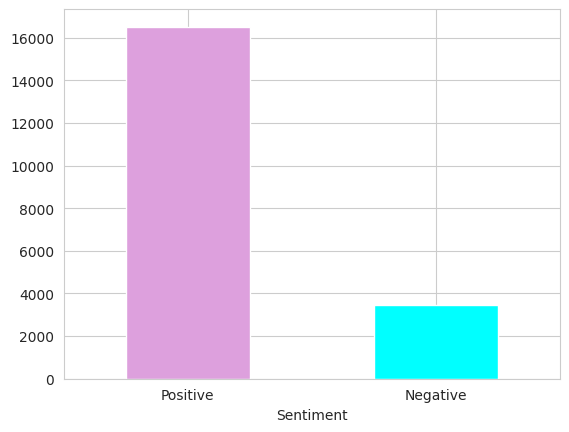

In [49]:
result = df4["Sentiment"].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [50]:
df4.groupby("Sentiment").count()

,post_text,tokens,polarity
Sentiment,,,
Negative,3480,3480,3480
Positive,16520,16520,16520


In [51]:
df4.groupby("polarity").max().head(5)
# returns the tweets with maximum polarity i.e. most negative tweets

,post_text,tokens,Sentiment
polarity,,,
-1.000000,"wrong! said nsa &amp; cia, others convinces us...","[wrong, said, nsa, amp, cia, others, convinces...",Negative
-1.000000,@thebotanophile @jasonmillerindc @realdonaldtr...,"[thebotanophile, jasonmillerindc, realdonaldtr...",Negative
-0.976563,@the_newright everyone knows false news fromtn...,"[the_newright, everyone, knows, false, news, f...",Negative
-0.976562,exxonmobil helped defeat russia sanctions bill...,"[politicususa, joe, amp, mika, trump, putin, c...",Negative
-0.953674,really wan informed watch @cbsthismorning !!!!...,"[really, wan, informed, watch, cbsthismorning,...",Negative


## Visualize the results

Text(0.5, 1.0, 'Polarity Distribution')

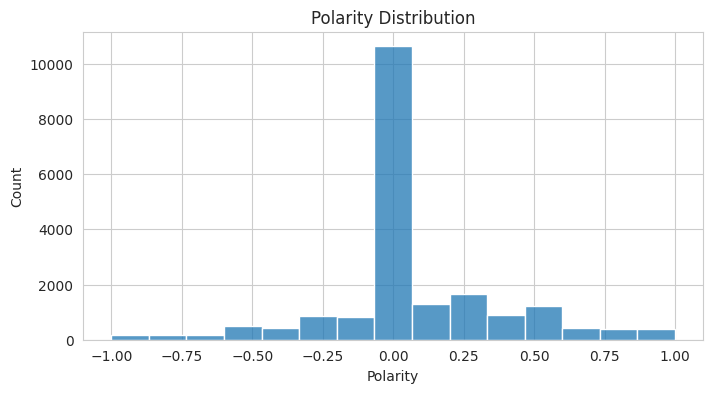

In [52]:
#Visualize distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(df4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

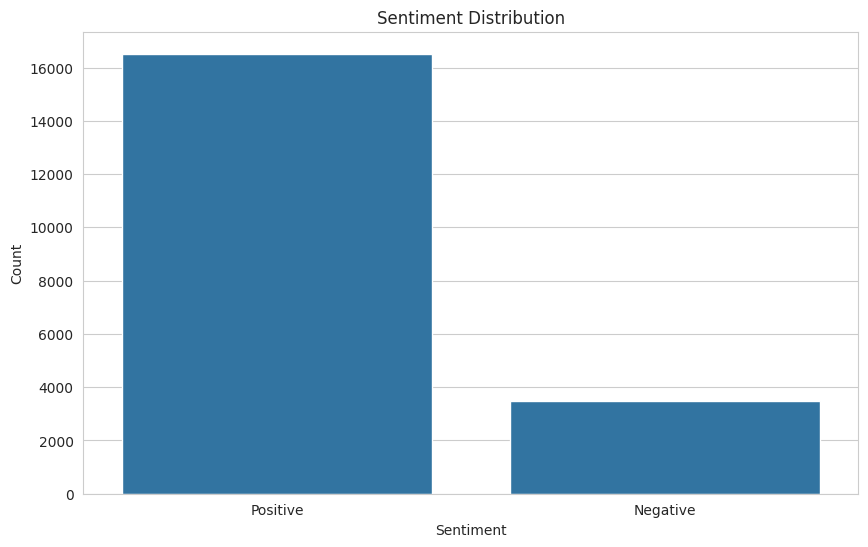

In [53]:
# Visualize distribution of sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df4,order=df4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42)

In [56]:
# Convert the text data into numerical features using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [57]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.92725


In [58]:
# Create a classification report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.76      0.85      0.81       705
    Positive       0.97      0.94      0.96      3295

    accuracy                           0.93      4000
   macro avg       0.87      0.90      0.88      4000
weighted avg       0.93      0.93      0.93      4000



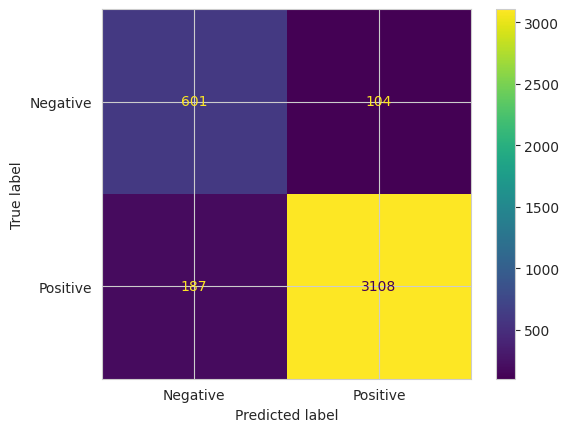

In [59]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [60]:
# Check to see if the decision tree is overfitting or underfitting
print('The training score is',round(clf.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(clf.score(X_test, y_test)*100,2),'%')

The training score is 100.0 %
The testing score is 92.73 %


In [61]:
# check to see if data is balanced
df4['Sentiment'].value_counts()

,count
Sentiment,
Positive,16520
Negative,3480


# Random Forest Classifier

In [62]:
# create a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
# Evaluate the classifier on the testing set
accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.91875


In [64]:
# Get the accuracy score of the model
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(rfc.predict(X_test), y_test)*100,2),'%')

The accuracy of the Random Forest Classifier is 91.88 %


In [65]:
# Create a classification report
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.79      0.74      0.76       705
    Positive       0.95      0.96      0.95      3295

    accuracy                           0.92      4000
   macro avg       0.87      0.85      0.86      4000
weighted avg       0.92      0.92      0.92      4000



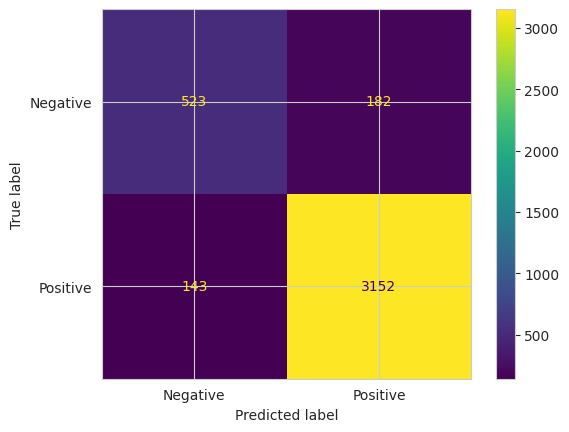

In [66]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

# KNN Classifier

In [67]:
# create a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [68]:
# Evaluate the classifier on the testing set
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.84475


In [69]:
# Get the accuracy score of the model
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')

The accuracy of the KNN Classifier is 84.47 %


In [70]:
# Create a classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.80      0.16      0.27       705
    Positive       0.85      0.99      0.91      3295

    accuracy                           0.84      4000
   macro avg       0.82      0.58      0.59      4000
weighted avg       0.84      0.84      0.80      4000



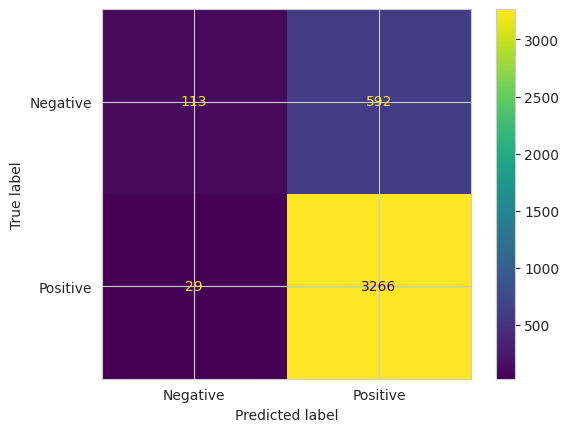

In [71]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

# Naive Bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8785


In [73]:
# Create a classification report
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.86      0.37      0.52       705
    Positive       0.88      0.99      0.93      3295

    accuracy                           0.88      4000
   macro avg       0.87      0.68      0.72      4000
weighted avg       0.88      0.88      0.86      4000



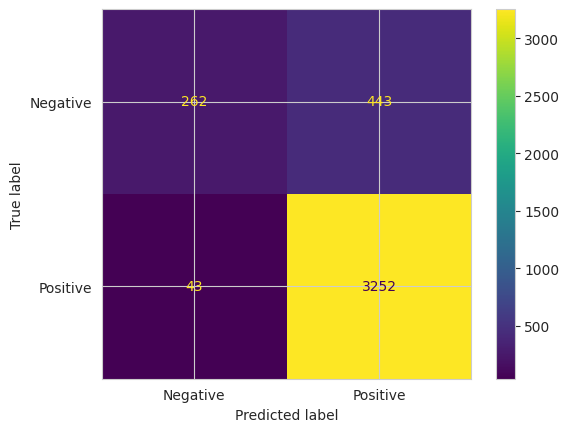

In [74]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, nb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [79]:
import tensorflow as tf
from tensorflow import lite
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [85]:
nb = Sequential()
nb.add(Dense(64, activation='relu', input_shape=[4]))
nb.add(Dense(64))
nb.add(Dense(3, activation='softmax'))  # 3 output neurons for 3 classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
nb.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

In [99]:
import tensorflow as tf
from tensorflow import lite
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have already created and fit your CountVectorizer (vectorizer)
X = vectorizer.transform(df4['post_text'])  # Get numerical features
num_features = X.shape[1]  # Number of features

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)  # sparse=False for Dense layers
y = encoder.fit_transform(df4[['Sentiment']])

# Define the model with corrected input shape
nb = Sequential()
nb.add(Dense(64, activation='relu', input_shape=[num_features]))  # Correct input shape
nb.add(Dense(64))
nb.add(Dense(y.shape[1], activation='softmax'))  # Output neurons match target classes

# Compile the model
nb.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

# Train the model with the numerical features and one-hot encoded target
nb.fit(X, y, epochs=200)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - acc: 0.8174 - loss: 0.5036
Epoch 2/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8343 - loss: 0.4334
Epoch 3/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - acc: 0.8216 - loss: 0.4363
Epoch 4/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.8301 - loss: 0.3990
Epoch 5/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - acc: 0.8429 - loss: 0.3583
Epoch 6/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8720 - loss: 0.3099
Epoch 7/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - acc: 0.8966 - loss: 0.2588
Epoch 8/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - acc: 0.9107 - loss: 0.2227
Epoch 9/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.9269 - loss: 0.1931
Epoch 10/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - acc: 0.9422 - loss: 0.1614
Epoch 11/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - acc: 0.9526 - loss: 0.1408
Epoch 12/200
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.9622 - loss: 0.

In [97]:
# ... previous code ...

# Assuming you have already created and fit your CountVectorizer (vectorizer)
X = vectorizer.transform(df4['post_text']).toarray()  # Convert to dense array
num_features = X.shape[1]  # Number of features

# ... rest of your code ...

In [100]:
converter= lite.TFLiteConverter.from_keras_model(nb)
tflite_model= converter.convert()
open("dep.tflite","wb").write(tflite_model)

Saved artifact at '/tmp/tmpchyav2jg'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28151), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  133675131162112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133675131173024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133675131116832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133675131109440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133675131118240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133675131119120: TensorSpec(shape=(), dtype=tf.resource, name=None)


7225792

In [101]:
import os

# Get current working directory
current_directory = os.getcwd()

# Print the full path to the file
file_path = os.path.join(current_directory, 'depression.tflite')
print(f"Path to depression.tflite: {file_path}")

Path to depression.tflite: /content/depression.tflite
